In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("Advertising.csv")
df.head()


,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


# Step - : Data Preprocessing

> by combining all the features, we get the "total spend"

In [7]:
df['total_spend']= df['TV']+ df['radio']+ df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


# Remove unwanted columns from the table

In [8]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


 #### Exploratory Data Analysis (EDA)

In [9]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


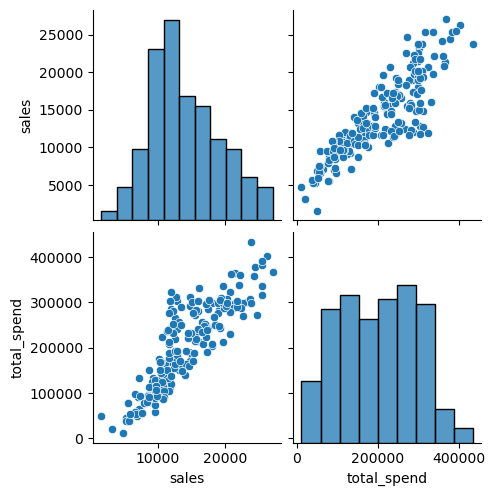

In [10]:
sns.pairplot(df)
plt.show()


In [11]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


##### Data Cleaning

In [12]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

##### Data Wangling
no encoding is required (no categorical data)

##### create X and Y

In [15]:
x=df[['total_spend']]
y=df['sales']

##### Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

#### Modelling

In [22]:
#import
from sklearn.linear_model import LinearRegression

# save the model
model=LinearRegression()

#fit
model.fit(x_train,y_train)

print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 4169.512013489044
Coefficients: [0.0489571]


#### Evaluation
###### Prediction

In [23]:
ypred_test=model.predict(x_test)

###### Mean Absolute Error (MAE) is the mean of the absolute value of the errors:     

                             1/n ∑ |y−^y∣

In [24]:
from sklearn.metrics import mean_absolute_error
print("test MAE:", mean_absolute_error(y_test,ypred_test))

test MAE: 2088.4273558466143


##### Mean Squared Error (MSE) is the mean of the squared errors:   


                                1/n ∑ (y−^y)2

In [26]:
from sklearn.metrics import mean_squared_error
print("Test MSE:", mean_squared_error(y_test,ypred_test))

Test MSE: 7779806.406885764


##### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

                           _____________  
                          √1/n ∑ (y−^y)2 

In [27]:
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,ypred_test)))


Test RMSE: 2789.230432733331


In [28]:
# Test R2
print("Test R2:", model.score(x_test,y_test))

Test R2: 0.7535196255373878


## Model Selection

##### checklist 1: check whether model is good or either having overfitting/underfitting  problem


##### test accuracy = train accuracy



In [30]:
# prediction on train data
ypred_train = model.predict(x_train)

# Train R2
print("Train R2:",model.score(x_train,y_train))

Train R2: 0.7524092686260718


 #### Checklist 2: whether the Test Accuracy - Cross validation Score

In [31]:
from sklearn.model_selection import cross_val_score

scores =cross_val_score(model,x,y,cv=5)

print(scores)

print("cross validation score:", scores.mean())


[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
cross validation score: 0.743378317855542


##### checklist 3: check whether, it satisfies the Business problem Requirements

##### checklist 4: (only for Linear Regression): check for Assumption

1. Linearity of Errors

In [32]:
error =y_test-ypred_test

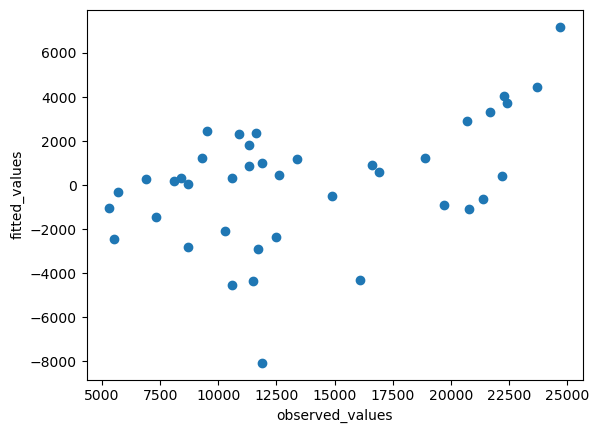

In [33]:
plt.scatter(y_test,error)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

#### 2.Normality of Errors

In [35]:
error.skew()

np.float64(-0.3207498673436375)

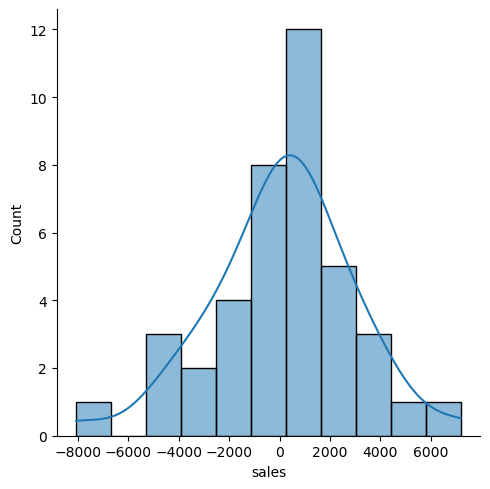

In [36]:
sns.displot(error,kde=True)
plt.show()

##### 3.Equal Variance of Errors (Homoscadsicity)

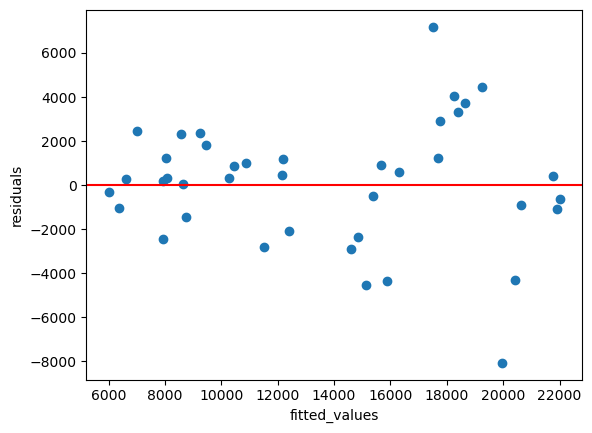

In [38]:
plt.scatter(ypred_test,error)
plt.axhline(y=0,color='red')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

##### 4.Variables Significamce

In [39]:
import statsmodels.formula.api as smf
model2= smf.ols("y~x",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           5.06e-62
Time:                        17:08:45   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Final Model

In [42]:
# Modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

#Prediction
ypred_train= model.predict(x_train)
ypred_test = model.predict(x_test)

#Evvalution
print("Train R2:",model.score(x_train,y_train))
print("Test R2:",model.score(x_test,y_test))
print("cross Validation Score:",cross_val_score(model,x,y,cv=5).mean())

Intercept: 4169.512013489044
Coefficients: [0.0489571]
Train R2: 0.7524092686260718
Test R2: 0.7535196255373878
cross Validation Score: 0.743378317855542


In [43]:
new_data=pd.DataFrame({"total_spend":[200000]})
new_data

,total_spend
0,200000


In [44]:
model.predict(new_data)

array([13960.93124868])

### Save a Model

In [45]:
from joblib import dump
dump(model, 'sales_model.joblib')

['sales_model.joblib']

## Load a Model & Predict

In [47]:
from joblib import load
loaded_model = load('sales_model.joblib')
loaded_model.predict(new_data)

array([13960.93124868])